In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df= pd.read_csv('Kaggle/umami_dataset.csv', delimiter="\t")

In [7]:
print("Dataset fields: ")
df.columns

Dataset fields: 


Index(['name', 'region', 'group', 'inosinate', 'guanylate', 'adenylic',
       'glutamate', 'aspartate', 'threonine', 'serine', 'asparagine',
       'glutamine', 'proline', 'glycine', 'alanine', 'valine', 'cysteine',
       'methionine', 'isoleucine', 'leucine', 'tyrosine', 'phenylalanine',
       'tryptophan', 'lysine', 'histidine', 'arginine', 'source'],
      dtype='object')

In [8]:
print("Group categories")
df["group"].unique()

Group categories


array(['Fishes and Shellfishes', 'Vegetables', 'Beverages', 'Fruits',
       'Seasonings and Spices', 'Cereals', 'Meats', 'Mushrooms',
       'Nuts and Seeds', 'Milks', 'Pulses', 'Algae', 'Eggs',
       'Potatoes and Starches', 'Fats and Oils'], dtype=object)

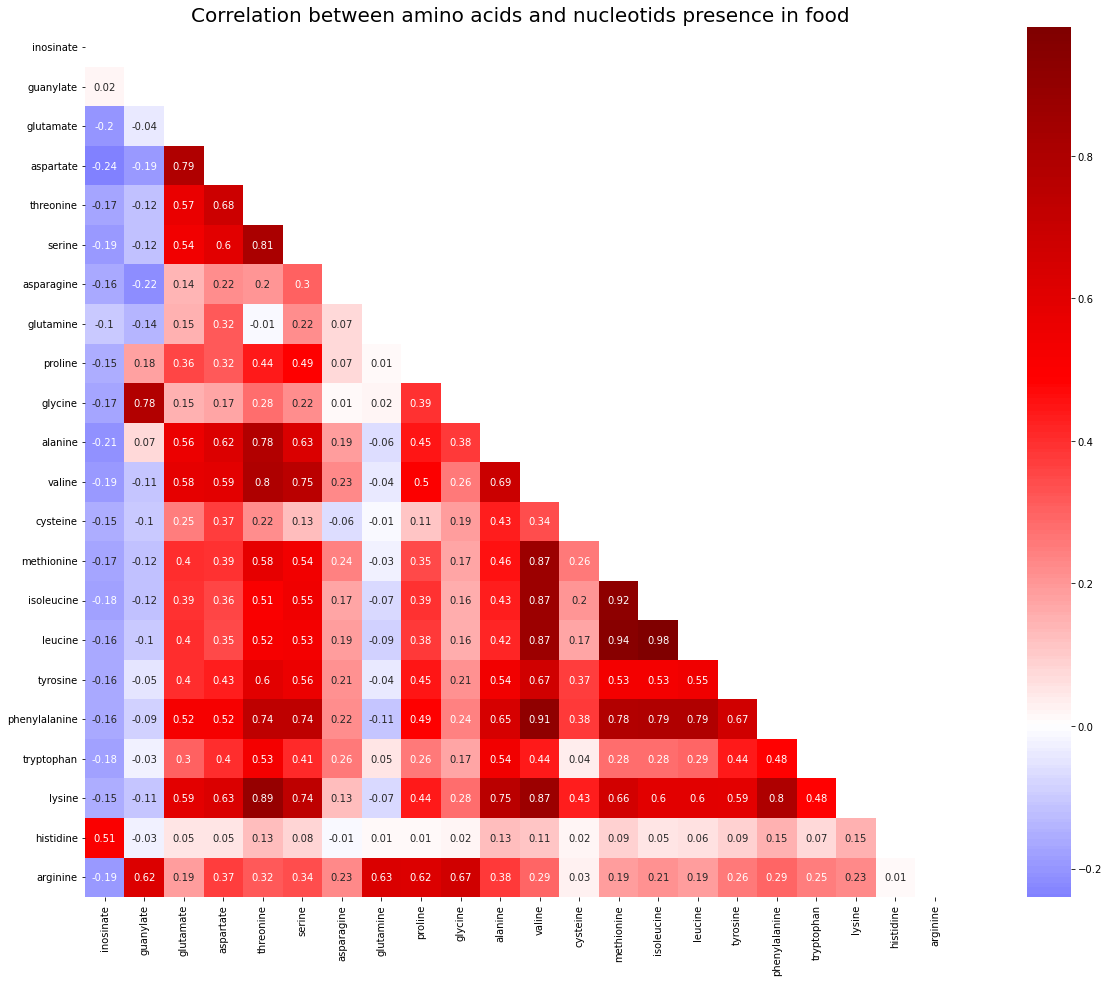

In [9]:
from seaborn import heatmap
from matplotlib import cm

# Dropping adenylic acid as there's only one product with measured amount
df_sans_adenylic = df.drop(["adenylic"], axis=1)

plt.figure(figsize=[26,16])
mask = np.zeros_like(df_sans_adenylic.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
heatmap(round(df_sans_adenylic.corr(), 2), mask=mask, center=0, square=True, annot=True, annot_kws={"size":10}, cmap=cm.seismic)
plt.title("Correlation between amino acids and nucleotids presence in food", size=20)
plt.show()

In [10]:
max_glutamate_index = df["glutamate"].idxmax()
max_glutamate_name = df.iloc[max_glutamate_index]['name']
max_glutamate_amount = df.iloc[max_glutamate_index]['glutamate']
print(f"The food with highest glutamate content is {max_glutamate_name}, with {max_glutamate_amount}mg / 100g")
max_aspartate_index = df["aspartate"].idxmax()
max_aspartate_name = df.iloc[max_aspartate_index]['name']
max_aspartate_amount = df.iloc[max_aspartate_index]['aspartate']
print(f"The food with highest aspartate content is {max_aspartate_name}, with {max_aspartate_amount}mg / 100g")
max_tryptophan_index = df["tryptophan"].idxmax()
max_tryptophan_name = df.iloc[max_tryptophan_index]['name']
max_tryptophan_amount = df.iloc[max_tryptophan_index]['tryptophan']
print(f"The food with highest tryptophan content is {max_tryptophan_name}, with {max_tryptophan_amount}mg / 100g")
max_inosinate_index = df["inosinate"].idxmax()
max_inosinate_name = df.iloc[max_inosinate_index]['name']
max_inosinate_amount = df.iloc[max_inosinate_index]['inosinate']
print(f"The food with highest inosinate content is {max_inosinate_name}, with {max_inosinate_amount}mg / 100g")

The food with highest glutamate content is Kombu, Makombu, 1st grade, harvest of 2002, with 3049.0mg / 100g
The food with highest aspartate content is Kombu, Rausu, 2nd grade, harvest of 2002, with 1905.12mg / 100g
The food with highest tryptophan content is Shrimp paste, Nappi, with 319.16mg / 100g
The food with highest inosinate content is Flying fish, boiled and dried, with 1900.4mg / 100g


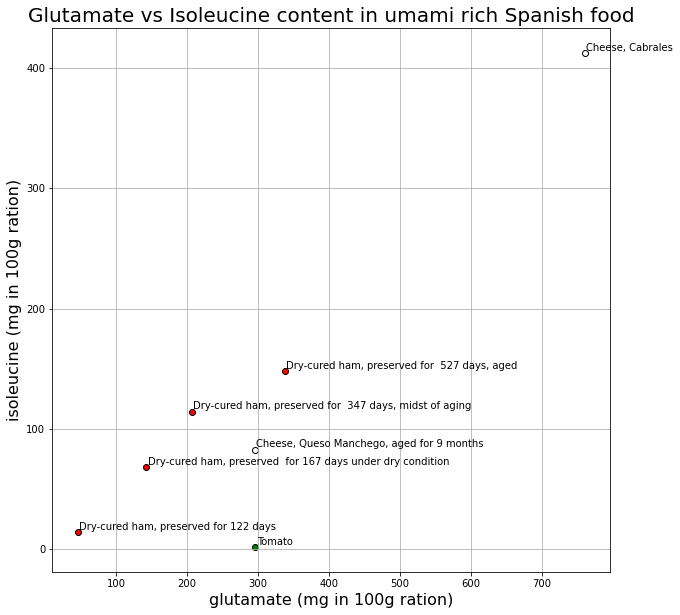

In [11]:
food_from_spain = df.loc[(df["region"] == "Spain") & (df["glutamate"] > 35)]
food_from_spain_milk = food_from_spain[food_from_spain["group"] == "Milks"]
food_from_spain_meat = food_from_spain[food_from_spain["group"] == "Meats"]
food_from_spain_vegs = food_from_spain[food_from_spain["group"] == "Vegetables"]

plt.figure(figsize=[10,10])
plt.title("Glutamate vs Isoleucine content in umami rich Spanish food", size=20)
plt.scatter(x=food_from_spain_milk["glutamate"], y=food_from_spain_milk["isoleucine"], color="white", edgecolors="black")
plt.scatter(x=food_from_spain_meat["glutamate"], y=food_from_spain_meat["isoleucine"], color="red", edgecolors="black")
plt.scatter(x=food_from_spain_vegs["glutamate"], y=food_from_spain_vegs["isoleucine"], color="green", edgecolors="black")
for index, row in food_from_spain.iterrows():
    plt.annotate(row["name"], (row["glutamate"] + 2, row["isoleucine"] + 2))
plt.xlabel("glutamate (mg in 100g ration)", size=16)
plt.ylabel("isoleucine (mg in 100g ration)", size=16)
plt.grid()
plt.show()

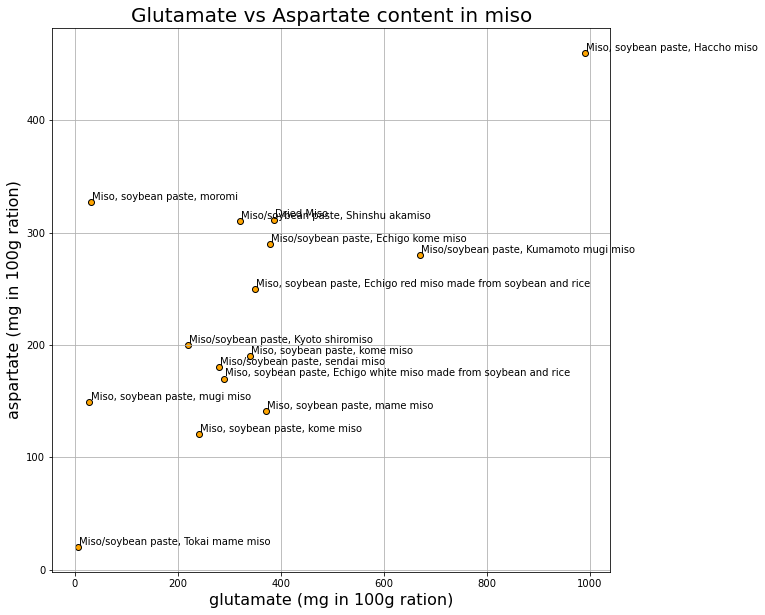

In [12]:
miso = df[df['name'].str.contains("Miso")]
plt.figure(figsize=[10,10])
plt.title("Glutamate vs Aspartate content in miso", size=20)
plt.scatter(x=miso["glutamate"], y=miso["aspartate"], color="orange", edgecolors="black")
for index, row in miso.iterrows():
    plt.annotate(row["name"], (row["glutamate"] + 2, row["aspartate"] + 2))
plt.xlabel("glutamate (mg in 100g ration)", size=16)
plt.ylabel("aspartate (mg in 100g ration)", size=16)
plt.grid()
plt.show()